#  Задание 1 Python

In [1]:
import time
def timer(f):
    def tmp(*args, **kwargs):
        t = time.time()
        res = f(*args, **kwargs)
        print "Время выполнения функции: %f" % (time.time()-t)
        return res

    return tmp

def memoized(f):
    memory = {}

    def wrapper(*args, **kwargs):
        key = (tuple(args), hash(tuple(sorted(kwargs.items()))))
        if not key in memory:
            memory[key] = f(*args, **kwargs)
        return memory[key]
    return wrapper

In [15]:
@memoized
@timer
def fibo(a):
    if (a <= 2):
        return 1
    return fibo(a - 1) + fibo(a - 2)

In [16]:
#Пример использования без кеширования, так как с кешированием все мгновенно происходит.
fibo(20)

Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения фун

6765

In [17]:
import math

In [18]:
def compl(re, im):
    """
    Return absolute value, and angle of complex number, if number = 0, return (0,0). Arguments are real and imaginary part of
    number
    >>> compl(1,0)
    (1.0, 0.0)
    >>> compl(0,1)
    (1, 1.5707963267948966)
    >>> compl (3,4)
    (5.0, 0.7853981633974483)
    """
    if (re == 0 and im == 0):
        return 0,0 #непонятно какой угол возвращать, вернем 0:) 
    elif (re == 0 and im > 0):
        return im, math.pi / 2
    elif (re == 0 and im < 0):
        return -im, -math.pi / 2
    elif (re > 0):
        return math.sqrt(re ** 2 + im ** 2), math.atan(im / re)
    elif (re < 0):
        return math.sqrt(re ** 2 + im ** 2), math.atan(im / re) + math.pi

    

In [19]:

if __name__ in ("__main__", "__console__"):
    import doctest
    doctest.testmod(verbose=True)

Trying:
    compl(1,0)
Expecting:
    (1.0, 0.0)
ok
Trying:
    compl(0,1)
Expecting:
    (1, 1.5707963267948966)
ok
Trying:
    compl (3,4)
Expecting:
    (5.0, 0.7853981633974483)
ok
4 items had no tests:
    __main__
    __main__.fibo
    __main__.memoized
    __main__.timer
1 items passed all tests:
   3 tests in __main__.compl
3 tests in 5 items.
3 passed and 0 failed.
Test passed.


In [20]:
class Complex():
    def __init__(self, re, im):
        self.re = re
        self.im = im
        
    @property
    def re(self):
        print 're - getter'
        return self.re
    
    @property
    def im(self):
        print 'im - getter'
        return self.im
    
    @re.setter
    def re(self, value):
        self.re = value
        
    @im.setter
    def im(self, value):
        self.im = value
        
    def __str__(self):
        if (self.im > 0):
            return 'number = ' + str(self.re)  + '+' +str(self.im) + 'i'
        elif(self.im < 0):
            return 'number = ' + str(self.re) +str(self.im) + 'i'
        else:
            return 'number = ' + str(self.re)
    
    def calc_abs_and_angle(self):
        if (self.re == 0 and self.im == 0):
            return 0,0 #непонятно какой угол возвращать, вернем 0:) 
        if (self.re != 0):
            return math.sqrt(self.re ** 2 + self.im ** 2), math.atan(self.im / self.re)
        elif (self.im > 0):
            return self.im, math.pi / 2
        else:
            return -self.im, -math.pi / 2
        
    def __add__(self, other):
        return Complex(self.re + other.re, self.im + other.im)
        
    def __sub__(self, other):
        return Complex(self.re - other.re, self.im - other.im)
    
    def __mul__(self, other):
        return Complex(self.re * other.re - self.im * other.im, self.im * other.re + self.re * other.im)
    
    def __div__(self, other):
        if (other.re == 0 and other.im == 0):
            raise ZeroDivisionError
        return Complex(1.0 * (self.re * other.re + self.im * other.im) / (other.re ** 2 + other.im ** 2),
                     1.0 * (other.re * self.im - other.im * self.re)/ (other.re ** 2 + other.im ** 2))
        

In [30]:
a = Complex(1,2)
b = Complex(2,3)
c = Complex(2,1)
d = Complex(1,1)
e = Complex(0,0)
print a + b
print a - b + c
print d * d
print d / d
print a / b
print a / e

number = 3+5i
number = 1
number = 0+2i
number = 1.0
number = 0.615384615385+0.0769230769231i


ZeroDivisionError: 

# Задание 2 BeautifulSoup

In [32]:
import urllib2
from BeautifulSoup import BeautifulSoup
url = urllib2.urlopen("http://www.vedomosti.ru/finance/articles/2016/04/18/638060-kurs-rublya")
soup = BeautifulSoup(''.join(url))
text = soup.findAll('p', align = True)
for tag in text:
    if (tag.string != None):
        print (tag.string)


  После открытия торгов в понедельник, 18 апреля, курсы доллара и евро на Московской бирже взлетели в условиях обвала цен нефти после неудачи переговоров нефтедобывающих стран в Дохе. Соглашение о замораживании добычи нефти было изменено по инициативе Саудовской Аравии, настоявшей на включении в него Ирана. Иран, не участвовавший во встрече, не взял на себя обязательств по сокращению добычи.


  Первые сделки по доллару прошли в диапазоне 67,9-68,7 руб. за доллар, к 10.20 мск курс доллара был на отметке 68,5 руб. Это больше 2 руб. к отметке предыдущего закрытия. Курс евро оказался в районе 77,3 руб. за евро (+2,3 руб.). Цены на нефть в понедельник снижались почти на 7%, на 10.00 мск снижение составляло более 5%. К 10.20 мск баррель Brent стоил $41,1 (-4%).


  Падение рубля (2,7%) оказалось самым глубоким среди всех мировых валют и наибольшим с 24 февраля, отмечает Bloomberg. То же относится к российским гособлигациям: доходность по пятилетним бумагам, растущая четвертый день, сегодня

# Задание 3 (NumPy)

In [33]:
import numpy as np
a = np.arange(24).reshape(3,4,2)
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19],
        [20, 21],
        [22, 23]]])

In [34]:
print a[0][1] #печатает "срез" массива - 2 строчку - одномерный массив

[2 3]


In [35]:
print a[0] #печатает "срез" массива - двумерный массив 

[[0 1]
 [2 3]
 [4 5]
 [6 7]]


In [36]:
print a[0][0][0] #печатает конкретное значение

0


In [37]:
print a[0:3,2] #можно так

[[ 4  5]
 [12 13]
 [20 21]]


In [38]:
print a[:2,:2] #и так

[[[ 0  1]
  [ 2  3]]

 [[ 8  9]
  [10 11]]]


In [39]:
print a[-1:] #c конца

[[[16 17]
  [18 19]
  [20 21]
  [22 23]]]


In [40]:
print a[-1:, -1:, 1]

[[23]]


In [41]:
print a[a>1] #одномерный массив из элементов больше 1

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [42]:
for x in a:
    print x # через цикл

[[0 1]
 [2 3]
 [4 5]
 [6 7]]
[[ 8  9]
 [10 11]
 [12 13]
 [14 15]]
[[16 17]
 [18 19]
 [20 21]
 [22 23]]


In [43]:
x = range(1000)

In [44]:
y = np.array(x)


In [45]:
%timeit sum(x)
%timeit y.sum()

100000 loops, best of 3: 5.59 µs per loop
The slowest run took 18.85 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.96 µs per loop


In [46]:
np.linspace(0, 2, 9)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

In [47]:
?np.linspace
np.linspace(0.3, 5.1, 10)

array([ 0.3       ,  0.83333333,  1.36666667,  1.9       ,  2.43333333,
        2.96666667,  3.5       ,  4.03333333,  4.56666667,  5.1       ])

In [48]:
def mylinspace(begin,end,count):
    return [begin + i * (1.0 * (end - begin)/(count - 1)) for i in range(count)]    

In [49]:
print (np.linspace(0,2,9))
print (mylinspace(0,2,9))
%timeit np.linspace(0,2,9)
%timeit mylinspace(0,2,9)

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.  ]
[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]
The slowest run took 7.69 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 4.31 µs per loop
100000 loops, best of 3: 2.38 µs per loop


 Странно, но наш linspace работает лучше, попробуем взять побольше значения

In [50]:
%timeit np.linspace(0,100,1005)
%timeit mylinspace(0,100,1005)

The slowest run took 7.16 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 6.19 µs per loop
10000 loops, best of 3: 193 µs per loop


Другое дело

# Задание 4 (MatPlotLib)

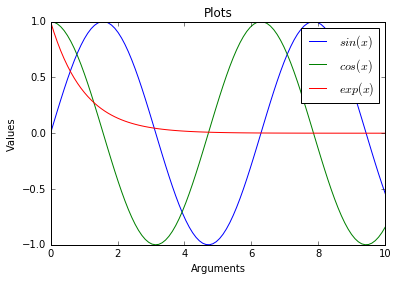

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline 
# чтобы изображения выводились прямо в ipython notebook, а не в отдельном окне
plt.xlabel('Arguments')
plt.ylabel('Values')
plt.title('Plots')
x = np.linspace(0.0,10.0,100)
plt.plot(x, np.sin(x), label='$sin(x)$')
plt.plot(x, np.cos(x), label='$cos(x)$')
plt.plot(x, np.exp(-x), label='$exp(x)$')
plt.legend()
plt.savefig("123.jpg")
plt.show()


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


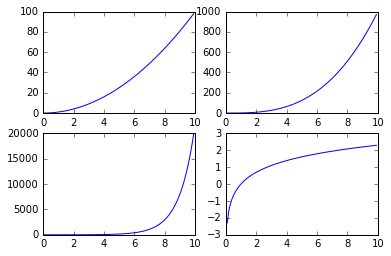

In [55]:
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
plt.plot(x, x **2)
?plt.plot
ax = fig.add_subplot(2,2,2)
plt.plot(x, x **3)

ax = fig.add_subplot(2,2,3)
plt.plot(x, np.exp(x))

ax = fig.add_subplot(2,2,4)
plt.plot(x, np.log(x))
plt.savefig("123.jpg")
plt.show()

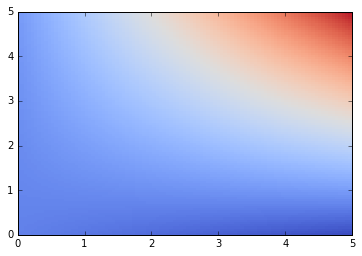

In [57]:
x = np.linspace(0,5, 100)
y = x
f = np.ndarray(shape = (100, 100))
for i in range(100):
    for j in range(100):
        f[i][j] = 3 * x[i] * y[j] + x[i] - 2 * y[j]

f_min, f_max = f.min(), f.max()
plt.pcolormesh(x, y, f, cmap = plt.cm.coolwarm, vmin = f_min, vmax = f_max)

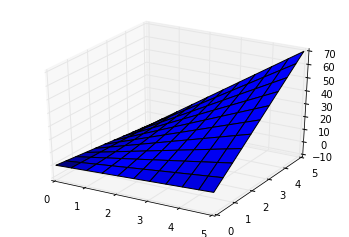

In [53]:
x1 = np.linspace(0,5,100)
y1 = np.linspace(0,5,100)
X,Y = np.meshgrid(x1,y1)
z = np.array([3*x*y + x - 2*y for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = z.reshape(X.shape)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z)


# Задание 5 SciPy

In [149]:
from scipy.optimize import minimize
x = np.linspace(-3,3,500)
eps = np.random.randn(500)
def func(x):
    return x ** 3 + 2 * x **2 - 3 * x - 2
y = func(x)
y = y + eps



In [150]:
def f(w):
    return sum(abs(w[0] * x ** 3 + w[1] * x ** 2 + w[2] * x + w[3] - y))

In [151]:
w = minimize(f, [0,0,0,0]).x


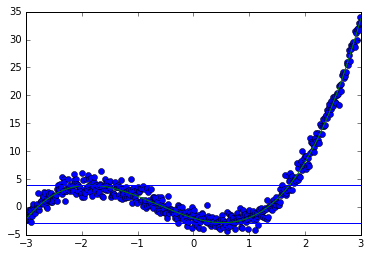

In [153]:
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
%matplotlib inline
g = w[0] * x ** 3 + w[1] * x ** 2 + w[2] * x + w[3]
plt.plot(x,y,'o')
plt.plot(x, g)
plt.axhline(g[argrelextrema(g, np.greater)])
plt.axhline(g[argrelextrema(g, np.less)])
plt.show()

### Задание 6 (Pandas + sclearn)

In [180]:
image_path = "C:\\Users\\Python\\sbt_python\\skin.jpg"
import pandas as pd
data = pd.read_csv('Skin_Non_Skin.txt', delimiter='\t', header=None)
y = data[3]
data = data.drop(3, axis=1)
old_data = data.copy

In [185]:
data['multiple1'] = data[0] * data[1]
data['multiple2'] = data[0] * data[2]
data['multiple3'] = data[1] * data[2]
data['diff1'] = abs(data[0] - data[1])
data['diff2'] = abs(data[0] - data[2])
data['diff3'] = abs(data[1] - data[2])

In [188]:
old_data = pd.read_csv('Skin_Non_Skin.txt', delimiter='\t', header=None)
old_data = old_data.drop(3, axis=1)

In [155]:
#label oriented
data.loc[0:1]


,0,1,2,multiple1,multiple2,multiple3,diff1,diff2,diff3
0,74,85,123,6290,9102,10455,11,49,38
1,73,84,122,6132,8906,10248,11,49,38


In [156]:
data.ix[0:3] #работает и с тем и с другим, однако если названия строк - числа - могут быть некоторые трудности

,0,1,2,multiple1,multiple2,multiple3,diff1,diff2,diff3
0,74,85,123,6290,9102,10455,11,49,38
1,73,84,122,6132,8906,10248,11,49,38
2,72,83,121,5976,8712,10043,11,49,38
3,70,81,119,5670,8330,9639,11,49,38


In [189]:
data.iloc[0:3] #positional oriented, 3 не включилоась

,0,1,2,multiple1,multiple2,multiple3,diff1,diff2,diff3
0,74,85,123,6290,9102,10455,11,49,38
1,73,84,122,6132,8906,10248,11,49,38
2,72,83,121,5976,8712,10043,11,49,38


In [201]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

print cross_val_score(KNeighborsClassifier(), data, y).mean(), 'full_data KNeighborsClassifier'
print cross_val_score(KNeighborsClassifier(), old_data, y).mean(), 'old_data KNeighborsClassifier\n'

print cross_val_score(LogisticRegression(), data, y).mean(), 'full_data Logistic Regression'
print cross_val_score(LogisticRegression(), old_data, y).mean(), 'old_data Logistic Regression\n'

print cross_val_score(RandomForestClassifier(), data, y).mean(), 'full_data Random Forest'
print cross_val_score(RandomForestClassifier(), old_data, y).mean(), 'old_data Random Forest'

0.969178696811 full_data KNeighborsClassifier
0.976887054221 old_data KNeighborsClassifier

0.979702590346 full_data Logistic Regression
0.897660571837 old_data Logistic Regression

0.96263330341 full_data Random Forest
0.975291533057 old_data Random Forest
